https://www.kaggle.com/competitions/automated-sleep-staging-beacon-biosignals-2023-2024

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import MinMaxScaler

In [6]:
# define file path 
file_path = "./../data/training_records/dreem_4.npy"

In [7]:
# load data
data = np.load(file_path)
df = pd.DataFrame(data)
df.set_index(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 833 entries, 0.0 to 832.0
Columns: 42000 entries, 1 to 42000
dtypes: float64(42000)
memory usage: 266.9 MB


In [8]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,41991,41992,41993,41994,41995,41996,41997,41998,41999,42000
0,,,,,,,,,,,,,,,,,,,,,
0.0,48.958179,289.857605,440.304291,457.762146,392.158569,343.100372,360.038544,402.229797,404.243286,361.426025,...,-0.002538,-0.002588,-0.002636,-0.002683,-0.002728,-0.002772,-0.002814,-0.002855,-0.002894,-0.002932
1.0,-21.141436,-18.994711,-15.770999,-11.973871,-8.844049,-7.953782,-9.385865,-11.870410,-14.267372,-16.423819,...,0.004255,0.001260,-0.001749,-0.004767,-0.007789,-0.010811,-0.013829,-0.016838,-0.019833,-0.022810
2.0,-136.722443,-161.557434,-193.386398,-218.709839,-229.786240,-230.833572,-229.184937,-225.267181,-213.160248,-190.925369,...,-0.000412,-0.000397,-0.000384,-0.000370,-0.000358,-0.000346,-0.000336,-0.000326,-0.000317,-0.000309
3.0,-37.698647,-39.676319,-41.194305,-42.283901,-42.877060,-42.640293,-41.678944,-40.654438,-40.181595,-40.203468,...,0.000482,0.000460,0.000437,0.000414,0.000391,0.000367,0.000344,0.000320,0.000296,0.000271
4.0,8.230938,5.293091,2.237200,-0.651246,-3.449110,-6.259340,-8.740939,-10.899554,-13.029634,-15.094961,...,0.000136,0.000142,0.000147,0.000152,0.000156,0.000160,0.000164,0.000167,0.000170,0.000173


### Missing values

There are no missing values in the dataset

In [7]:
# compute missing values 
print(f"Max nb of missing values in a column: {df.isna().sum(axis=0).max()}")

Max nb of missing values in a column: 0


### Distribution of values

Distributions of columns are very different. A scaling is reuqired to cope with the vast amount of variables. 

In [8]:
means = df.mean(axis=0)
stds = df.std(axis=0)

print(f"Mean of means: {np.mean(means)}")
print(f"Std of means: {np.std(means)}")
print(f"Max of means: {np.max(means)}")
print(f"Min of means: {np.min(means)}", '\n')

print(f"Mean of stds: {np.mean(stds)}")
print(f"Std of stds: {np.std(stds)}")
print(f"Max of stds: {np.max(stds)}")
print(f"Min of stds: {np.min(stds)}")

Mean of means: 0.00920827914046203
Std of means: 304.51736187077404
Max of means: 4740.350204970485
Min of means: -2798.2920409648423 

Mean of stds: 2566.193965987718
Std of stds: 9519.027995603961
Max of stds: 152261.85756348062
Min of stds: 0.008697053511495367


All variables wil be scaled to be compared easily. But before that, outliers have to be detected. 

In [9]:
# to do 

Now all variables are scaled using sickit-learn MinMaxScaler.

In [10]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the columns you want to scale
columns_to_scale = df.columns

# Fit and transform the selected columns
df_scaled = pd.DataFrame(scaler.fit_transform(df[columns_to_scale]), columns=columns_to_scale)

In [11]:
stds_scaled = df_scaled.std(axis=0).sort_values(ascending=False)

print(stds_scaled[:10])
print(stds_scaled[-10:])

13045    0.063011
8246     0.061949
8244     0.061896
8245     0.061882
8243     0.061561
8247     0.061549
8248     0.061132
8249     0.060785
8242     0.060534
29427    0.060505
dtype: float64
33635    0.022068
3336     0.022068
18442    0.022068
33633    0.022068
25977    0.022068
33634    0.022068
3885     0.022067
25978    0.022067
3825     0.022066
3810     0.022065
dtype: float64


For now, all columns are kept as I don't know if I can remove some of them only based on their spread. Now, let's have a look at correlation between variables. 

Before looking at correlation, we first group variables based on their natural category: First EEG, seconde EEG, ... 

Column 15001:22501: Third EEG (Frontal-frontal) channel sampled at 250Hz
Column 22501:30001: Fourth EEG (Frontal-occipital) channel sampled at 250Hz
Column 30001:37501: Fifth EEG (Frontal-occipital) channel sampled at 250Hz
Column 37501:39001: X-axis accelerometer channel sampled at 50Hz
Column 39001:40501: Y-axis accelerometer channel sampled at 50Hz
Column 40501:42001: Z-axis accelerometer channel sampled at 50Hz

In [43]:
category = {
    "First_EEG": (1, 7501, 250), 
    "Second_EEG": (7501, 15001, 250), 
    "Third_EEG": (15001, 22501, 250), 
    "Fourth_EEG": (22501, 30001, 250), 
    "Fifth_EEG": (30001, 37501, 250), 
    "X_axis": (37501, 39001, 50), 
    "Y_axis": (39001, 40501, 50), 
    "Z_axis": (40501, 42001, 50) 
}

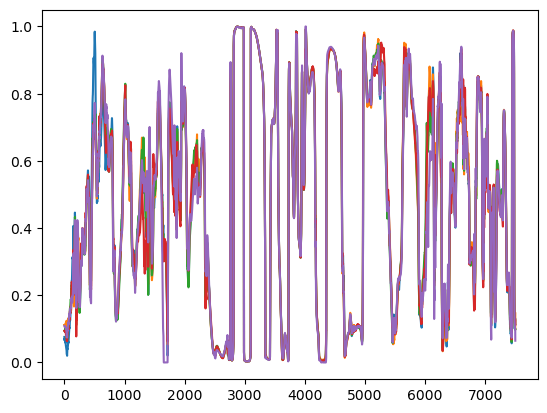

In [44]:
min_, max_, _ = category["First_EEG"]

for i in range(5):
    plt.plot(list(df_scaled.iloc[i, min_:max_]), label=i)

We can see in this plot various osciillations. A interesting question could be how this evolve regarding the target ? 

## Targets

In [14]:
targets = pd.read_csv('.././data/targets_train.csv')
targets.head()

,record,index,identifier,target
0,0,0,0,0
1,0,1,1,0
2,0,2,2,0
3,0,3,3,0
4,0,4,4,0


In [15]:
len(pd.unique(targets.identifier)), len(pd.unique(targets.index))

(6171, 6175)

In [28]:
join_df = targets.loc[targets.record==0].drop("record", axis=1).set_index('index')
df_scaled_with_target = df_scaled.join(join_df, how="left")
df_with_target = df.join(join_df, how="left")

In [40]:
df_scaled_with_target.head()

,1,2,3,4,5,6,7,8,9,10,...,41993,41994,41995,41996,41997,41998,41999,42000,identifier,target
0,0.087513,0.076052,0.068257,0.066534,0.068955,0.071115,0.070178,0.067016,0.065187,0.065481,...,0.290191,0.293784,0.297263,0.300637,0.303917,0.307111,0.310228,0.313276,0,0
1,0.111967,0.111407,0.111006,0.111429,0.112100,0.111935,0.110364,0.107682,0.105683,0.105043,...,0.296950,0.301108,0.305160,0.309116,0.312986,0.316780,0.320510,0.324184,1,0
2,0.095701,0.094017,0.093058,0.093517,0.094759,0.095717,0.095824,0.095179,0.095150,0.095972,...,0.390658,0.394375,0.398070,0.401755,0.405439,0.409130,0.412841,0.416579,2,0
3,0.095621,0.094159,0.093001,0.092801,0.093251,0.093705,0.093678,0.092906,0.092339,0.092122,...,0.294309,0.300501,0.306599,0.312620,0.318578,0.324490,0.330371,0.336236,3,0
4,0.109556,0.108710,0.107703,0.107304,0.107439,0.107589,0.107335,0.106438,0.105807,0.105577,...,0.304938,0.308860,0.312686,0.316427,0.320091,0.323690,0.327232,0.330727,4,0


1 First_EEG
2 Second_EEG
3 Third_EEG
4 Fourth_EEG
5 Fifth_EEG
6 X_axis
7 Y_axis
8 Z_axis


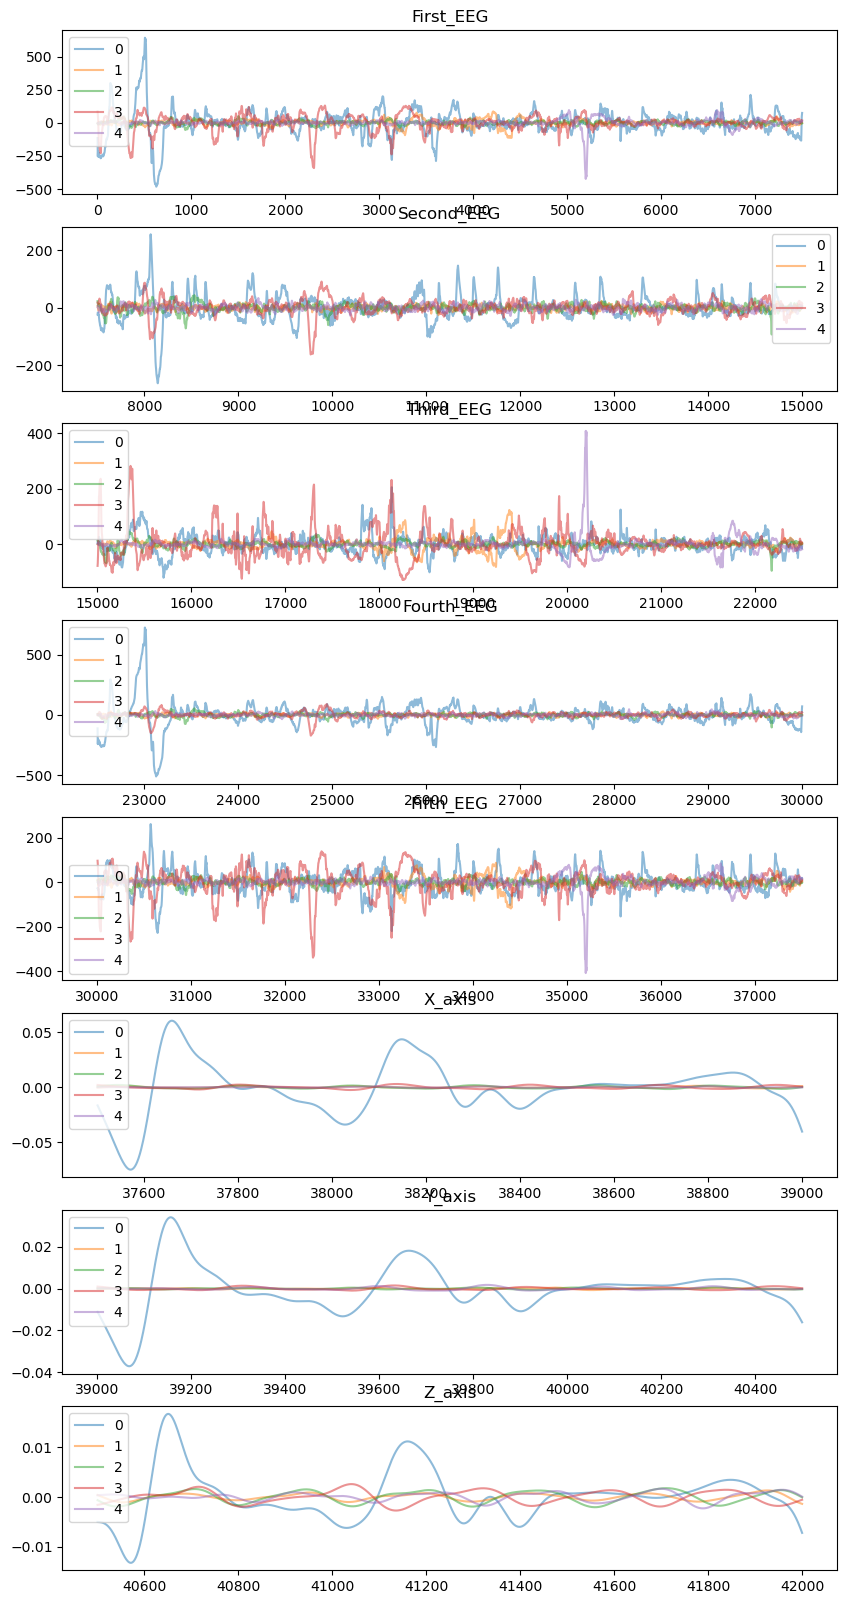

In [45]:
fig, ax = plt.subplots(len(category), 1, figsize=(10, 20))
i = 0

for cat, values in category.items():

    # get time series per category
    min_, max_, _ = category.get(cat)

    # plot ra time series and scaled time series
    for label in range(5):

        # plot time series
        ax[i].plot(df_with_target[df_with_target.target == label].iloc[0, min_-1:max_-1], label=str(label), alpha=0.5)
        ax[i].set_title(cat)
        ax[i].legend()

        # plot scaled time series
        #ax[i, 1].plot(df_scaled_with_target[df_scaled_with_target.target == label].iloc[0, min_-1:max_-1], label=str(label), alpha=0.5)
        #ax[i, 1].set_title(cat)
    i += 1
    print(i, cat)

plt.legend()

Looking at these plot, it seems obvious that magnitude of these time series are of a paramount importance. As class 0 seems more spread than other class, we plot the same thing withhout class 0. 

1 First_EEG
2 Second_EEG
3 Third_EEG
4 Fourth_EEG
5 Fifth_EEG
6 X_axis
7 Y_axis
8 Z_axis


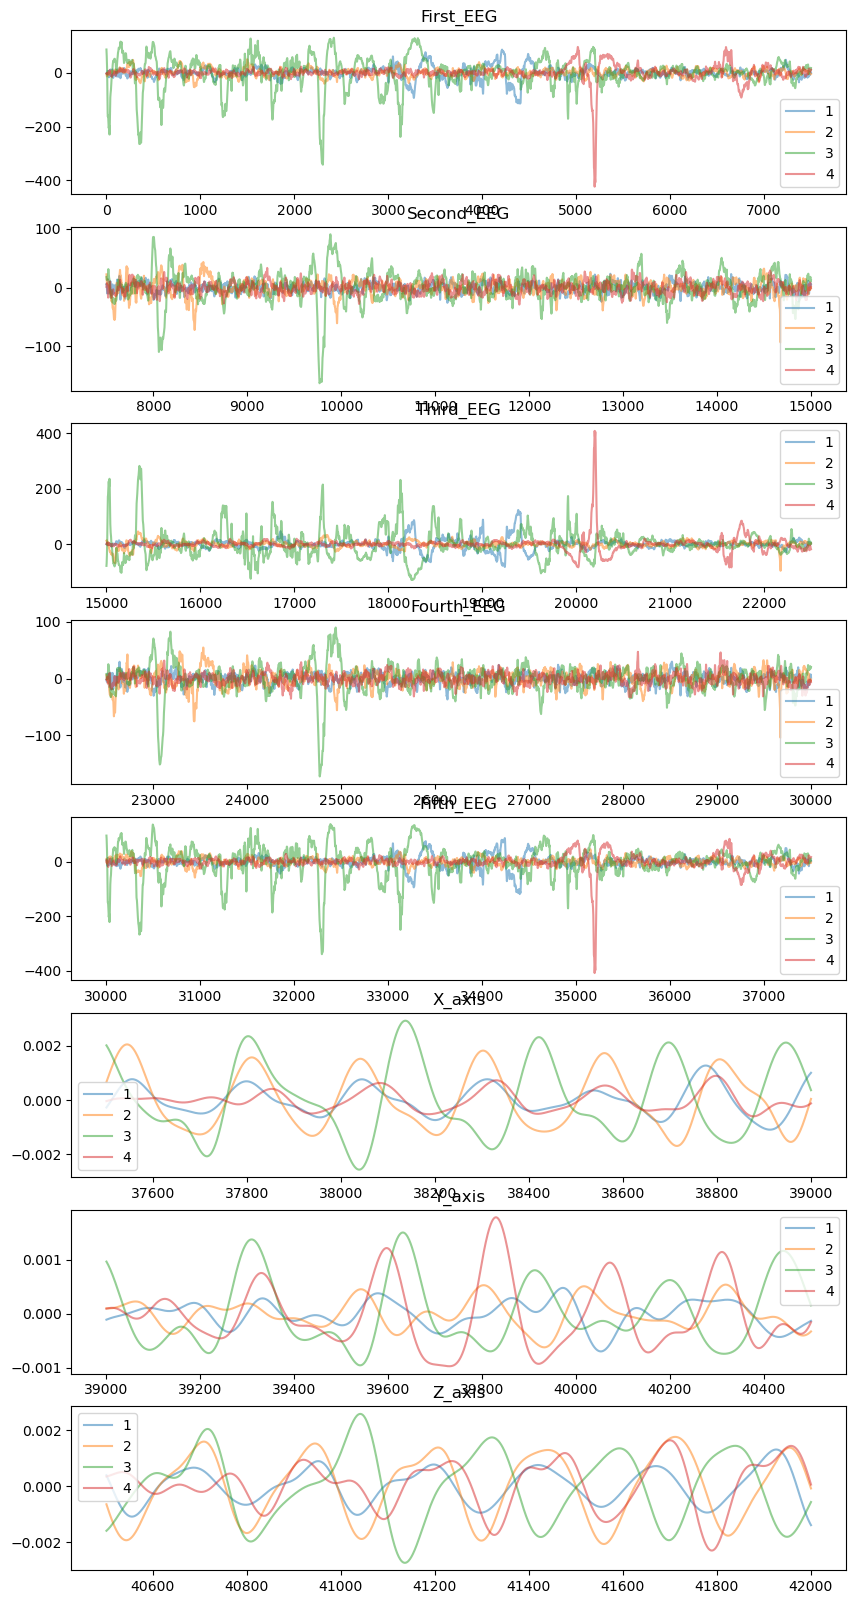

In [42]:
fig, ax = plt.subplots(len(category), 1, figsize=(10, 20))
i = 0

for cat, values in category.items():

    # get time series per category
    min_, max_, _ = category.get(cat)

    # plot ra time series and scaled time series
    for label in range(1, 5):

        # plot time series
        ax[i].plot(df_with_target[df_with_target.target == label].iloc[0, min_-1:max_-1], label=str(label), alpha=0.5)
        ax[i].set_title(cat)
        ax[i].legend()

        # plot scaled time series
        # ax[i, 1].plot(df_scaled_with_target[df_scaled_with_target.target == label].iloc[0, min_-1:max_-1], label=str(label), alpha=0.5)
        # ax[i, 1].set_title(cat)
    i += 1
    print(i, cat)

plt.legend()

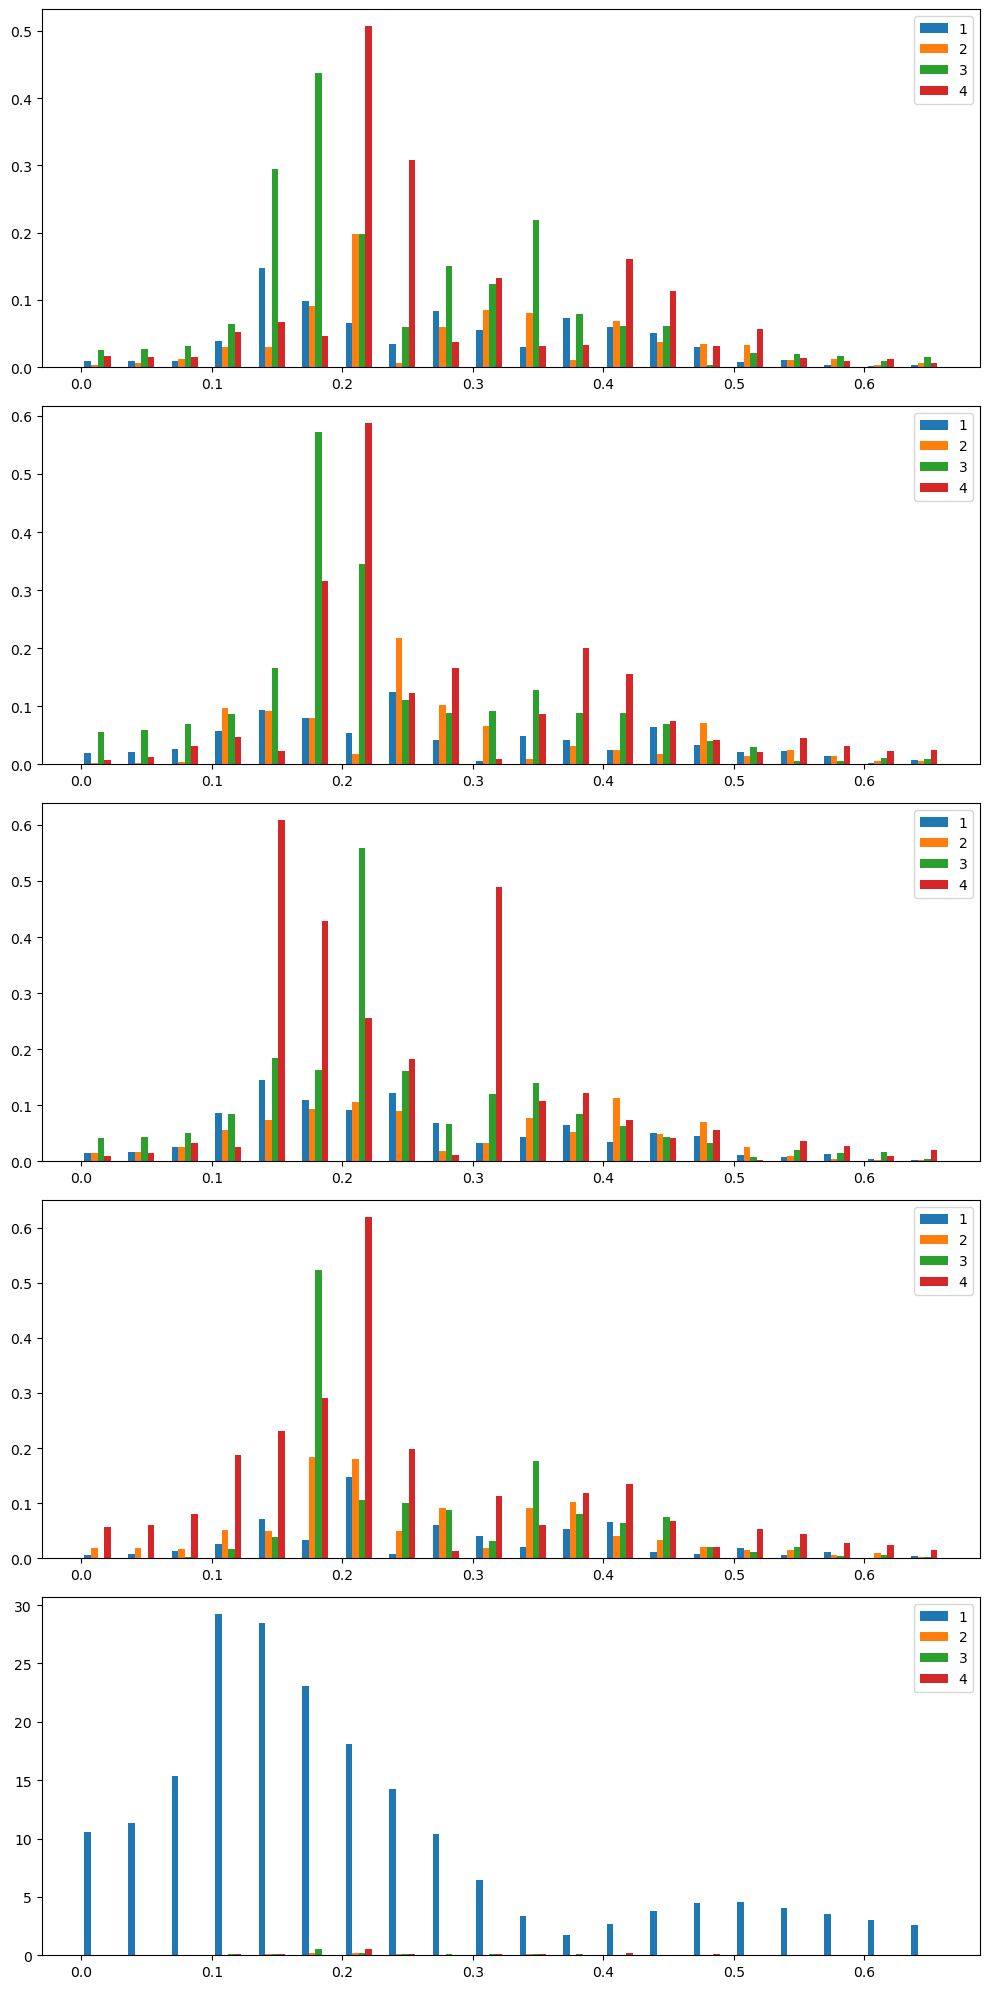

In [74]:
# parameters
min_freq, max_freq = 0, 20
offset= 0.005

# figure
nsignals = 5
fig, ax = plt.subplots(nsignals, 1, figsize=(10, 20))

# define my signal
min_, max_, sampling_rate = category.get("Y_axis")

# Compute and plot the frequency spectrum using FFT
for i in range(nsignals):
    for label in range(1, 5):

        # define our signal 
        signal = df_with_target[df_with_target.target == label].iloc[i, min_-1:max_-1]
        fft_result = np.fft.fft(signal)[min_freq: max_freq]
        fft_freq = np.fft.fftfreq(len(signal), d=1/sampling_rate)[min_freq: max_freq]

        ax[i].bar(x=fft_freq+label*offset, height=np.abs(fft_result), width=offset, label=str(label))
        ax[i].legend()

"""plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')"""

plt.tight_layout()
plt.show()